In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
import  matplotlib.ticker as mtick

import seaborn as sns

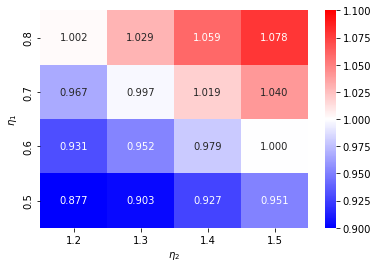

In [2]:
# Changing the cost

eta_1 = ['0.8', '0.7', '0.6', '0.5']
eta_2 = ['1.2', '1.3', '1.4', '1.5']

ratio = np.zeros((len(eta_1), len(eta_2)))
ratio_UB = np.zeros((len(eta_1), len(eta_2)))

for i, e1 in enumerate(eta_1):
    for j, e2 in enumerate(eta_2):
        
        # dir = 'Results-'+t_f+'-'+b_f+'/'
        dir = 'Results-cost/'
        file_name = 'result-'+e1+'-'+e2+'.csv'
        
        df = pd.read_csv(dir+file_name, header=None)
        
        
        
        LB = df.iloc[:, 1].to_numpy()
        # rescheduling = df.iloc[:, 2]
        cost = df.iloc[:, 3].to_numpy()
        
        # Derive real cost based on the success of re-scheduling
        re_scheduling_succuss = df.iloc[:, 2].to_numpy()
        for w in range(len(cost)):
            if re_scheduling_succuss[w] == 1:
                cost[w] = LB[w]
        
        
        UB = df.iloc[:, 4].to_numpy()
        ratio_UB[i][j] = np.mean(UB / LB)
        
        ratio[i][j] = np.mean(cost / UB)

cm = mpl.colormaps['bwr']
ratio_df = pd.DataFrame(data = ratio, index = eta_1, columns = eta_2)
ratio_df.index = eta_1
ratio_df.columns = eta_2


s1 = sns.heatmap(ratio_df, cmap = cm, 
                annot=True, fmt=".3f",
                vmin = 0.9, vmax = 1.1, 
                center = 1.0,
                )
s1.set(xlabel = '$\eta_2$', ylabel = '$\eta_1$')
fig1 = s1.get_figure()
fig1.savefig('Figures/changing_cost.png', dpi = 300, facecolor = 'white')


In [14]:
# Changing grid size

grid_size = ['3', '4', '5', '6', '7']
ratio = np.zeros(len(grid_size))
ratio_UB = np.zeros(len(grid_size))


for i in range(len(grid_size)):
    path = 'Results-grid/result-' + grid_size[i] + '-1.csv'
    df = pd.read_csv(path, header=None)  
    
    # Sort the df
    token_1_1 = [int(instance.split('-')[1][1:]) for instance in df[0]]
    token_1_2 = [int(instance.split('-')[2][1:]) for instance in df[0]]  
    df['sort_1'] = token_1_1
    df['sort_2'] = token_1_2
    df = df.sort_values(['sort_1', 'sort_2'])
    df.drop(['sort_1', 'sort_2'], axis = 1)


    LB = df.iloc[:, 1].to_numpy()    
    cost = df.iloc[:, 3].to_numpy()
    
    # Derive real cost based on the success of re-scheduling
    re_scheduling_succuss = df.iloc[:, 2].to_numpy()
    for w in range(len(cost)):
        if re_scheduling_succuss[w] == 1:
            cost[w] = LB[w]
        else:
            cost[w] = cost[w]
    
    
    UB = df.iloc[:, 4].to_numpy()
    ratio_UB[i] = np.mean(LB / UB)
    ratio[i] = np.mean(cost / UB)
    
    

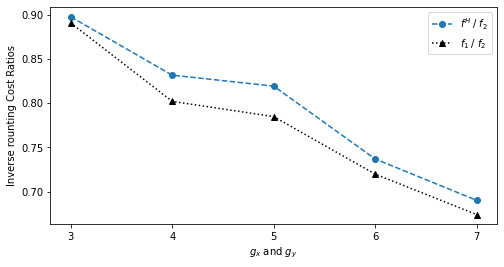

In [20]:

fig, ax = plt.subplots()

ax.plot(range(3, 8), ratio, 'o--', label='$f^H \; / \; f_2$')
ax.plot(range(3, 8), ratio_UB, '^k:', label='$f_1 \; / \; f_2$')
ax.legend()
ax.set_xlabel('$g_x$ and $g_y$')
ax.set_ylabel('Inverse rounting Cost Ratios')
ax.set_xticks(range(3, 8))

fig.set_size_inches(8, 4, forward=True)
fig.savefig('changing_grid_size.png', facecolor = 'white', dpi = 500, pad_inches = 0)

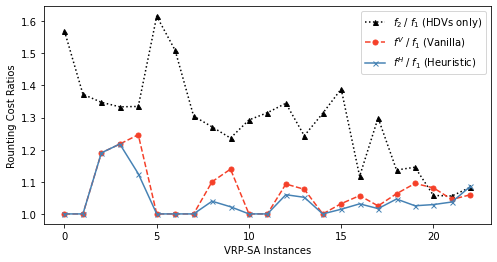

In [3]:
# Baseline results


path_1 = 'Results-heatmap-heuristic/result-1.2-1.csv'
path_2 = 'Results-heatmap-random/result-1.2-1.csv'
df_1 = pd.read_csv(path_1, header=None)
df_2 = pd.read_csv(path_2, header=None)


# Sort the instances
n = len(df_1)

token_1_1 = [int(instance.split('-')[1][1:]) for instance in df_1[0]]
token_1_2 = [int(instance.split('-')[2][1:]) for instance in df_1[0]]
token_2_1 = [int(instance.split('-')[1][1:]) for instance in df_2[0]]
token_2_2 = [int(instance.split('-')[2][1:]) for instance in df_2[0]]

df_1['sort_1'] = token_1_1
df_1['sort_2'] = token_1_2
df_2['sort_1'] = token_2_1
df_2['sort_2'] = token_2_2

df_1 = df_1.sort_values(['sort_1', 'sort_2'])
df_2 = df_2.sort_values(['sort_1', 'sort_2'])


df_1.drop(['sort_1', 'sort_2'], axis = 1)
df_2.drop(['sort_1', 'sort_2'], axis = 1)



fig, ax = plt.subplots()

LB = df_1.iloc[:, 1].to_numpy()
re_schedule_success = df_1.iloc[:, 2].to_numpy()
cost_1 = df_1.iloc[:, 3].to_numpy()
cost_2 = df_2.iloc[:, 3].to_numpy()
for i in range(n):
    if re_schedule_success[i] == 1:
        cost_1[i] = LB[i]
        cost_2[i] = LB[i]
UB = df_1.iloc[:, 4].to_numpy()


# Plot
ax.plot(UB / LB, '^:', label = '$f_2 \; / \; f_1$' + ' (HDVs only)', ms = 5, color = 'black')
ax.plot(cost_2 / LB, 'o--', label = '$f^V \; / \; f_1$' + ' (Vanilla)', ms = 5, color = '#f54029')
ax.plot(cost_1 / LB, 'x-', label = '$f^H \; / \; f_1$' + ' (Heuristic)', ms = 5, color = '#4682B4')

ax.legend()
ax.set_xlabel('VRP-SA Instances')
ax.set_ylabel('Rounting Cost Ratios')

# for i in range(n):
#     if re_schedule_success[i] == 1:
#         ax2.plot(i, 0, 'X', color = 'k')

fig.set_size_inches(8, 4, forward=True)
fig.savefig('main_result.png', facecolor = 'white', dpi = 500, pad_inches = 0)

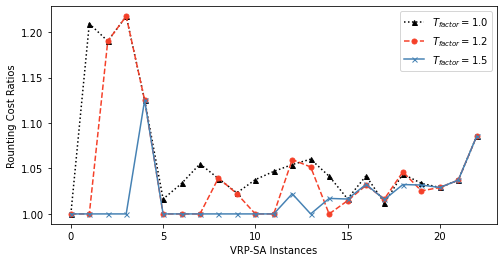

In [7]:
# Changing time-horizon factors
path_1 = 'Results-heatmap-heuristic/result-1.0-1.csv'
path_2 = 'Results-heatmap-heuristic/result-1.2-1.csv'
path_3 = 'Results-heatmap-heuristic/result-1.5-1.csv'

df_1 = pd.read_csv(path_1, header=None)
df_2 = pd.read_csv(path_2, header=None)
df_3 = pd.read_csv(path_3, header=None)



n = len(df_1)

# Sort the instances
token_1_1 = [int(instance.split('-')[1][1:]) for instance in df_1[0]]
token_1_2 = [int(instance.split('-')[2][1:]) for instance in df_1[0]]
token_2_1 = [int(instance.split('-')[1][1:]) for instance in df_2[0]]
token_2_2 = [int(instance.split('-')[2][1:]) for instance in df_2[0]]
token_3_1 = [int(instance.split('-')[1][1:]) for instance in df_3[0]]
token_3_2 = [int(instance.split('-')[2][1:]) for instance in df_3[0]]

df_1['sort_1'] = token_1_1
df_1['sort_2'] = token_1_2
df_2['sort_1'] = token_2_1
df_2['sort_2'] = token_2_2
df_3['sort_1'] = token_3_1
df_3['sort_2'] = token_3_2

df_1 = df_1.sort_values(['sort_1', 'sort_2'])
df_2 = df_2.sort_values(['sort_1', 'sort_2'])
df_3 = df_3.sort_values(['sort_1', 'sort_2'])


df_1.drop(['sort_1', 'sort_2'], axis = 1)
df_2.drop(['sort_1', 'sort_2'], axis = 1)
df_3.drop(['sort_1', 'sort_2'], axis = 1)



fig, ax = plt.subplots()

LB = df_1.iloc[:, 1].to_numpy()
re_schedule_success_1 = df_1.iloc[:, 2].to_numpy()
re_schedule_success_2 = df_2.iloc[:, 2].to_numpy()
re_schedule_success_3 = df_3.iloc[:, 2].to_numpy()


cost_1 = df_1.iloc[:, 3].to_numpy()
cost_2 = df_2.iloc[:, 3].to_numpy()
cost_3 = df_3.iloc[:, 3].to_numpy()

for i in range(n):
    if re_schedule_success_1[i] == 1:
        cost_1[i] = LB[i]
    if re_schedule_success_2[i] == 1:
        cost_2[i] = LB[i]  
    if re_schedule_success_3[i] == 1:
        cost_3[i] = LB[i]      
UB = df_1.iloc[:, 4].to_numpy()


# Plot
# ax.plot(UB / LB, '^:', label = 'HDV fleet only', ms = 5, color = 'black')
ax.plot(cost_1 / LB, '^:', label = '$T_{factor} = 1.0$', ms = 5, color = 'black')
ax.plot(cost_2 / LB, 'o--', label = '$T_{factor} = 1.2$', ms = 5, color = '#f54029')
ax.plot(cost_3 / LB, 'x-', label = '$T_{factor} = 1.5$', ms = 5, color = '#4682B4')


ax.legend()
ax.set_xlabel('VRP-SA Instances')
ax.set_ylabel('Rounting Cost Ratios')

fig.set_size_inches(8, 4, forward=True)
fig.savefig('changing_time_horizon.png', facecolor = 'white', dpi = 500, pad_inches = 0)

In [2]:

t_max_factor = ['1.0', '1.1', '1.2', '1.3', '1.4', '1.5']
budget_factor = ['3', '2', '1']

ratio = np.zeros((len(budget_factor), len(t_max_factor)))
real_ratio = np.zeros((len(budget_factor), len(t_max_factor)))
ratio_UB = 0

for i, b_f in enumerate(budget_factor):
    for j, t_f in enumerate(t_max_factor):
        
        # dir = 'Results-'+t_f+'-'+b_f+'/'
        dir = 'Results-heatmap-heuristic/'
        file_name = 'result-'+t_f+'-'+b_f+'.csv'
        
        df = pd.read_csv(dir+file_name, header=None)
        
        LB = df.iloc[:, 1].to_numpy()
        # rescheduling = df.iloc[:, 2]
        cost = df.iloc[:, 3].to_numpy()
        
        # Derive real cost based on the success of re-scheduling
        real_cost = np.zeros(len(cost))
        re_scheduling_succuss = df.iloc[:, 2].to_numpy()
        for w in range(len(cost)):
            if re_scheduling_succuss[w] == 1:
                real_cost[w] = LB[w]
            else:
                real_cost[w] = cost[w]
        
        
        if i == 0 and j == 0:
            UB = df.iloc[:, 4].to_numpy()
            ratio_UB = np.mean(UB / LB)
        
        ratio[i][j] = np.mean(cost / LB)
        real_ratio[i][j] = np.mean(real_cost / LB)

ratio_decrease = (ratio_UB - ratio) / ratio_UB
real_ratio_decrease = (ratio_UB - real_ratio) / ratio_UB

In [3]:
# Create a colormap
orchid = (218, 112, 214)
skyblue = (171, 215, 230)

num_sample = 100
color_1 = np.linspace(skyblue[0], orchid[0], 100) / 256
color_2 = np.linspace(skyblue[1], orchid[1], 100) / 256
color_3 = np.linspace(skyblue[2], orchid[2], 100) / 256

my_color = ListedColormap(np.vstack((color_1, color_2, color_3)).T, name = "my_color")

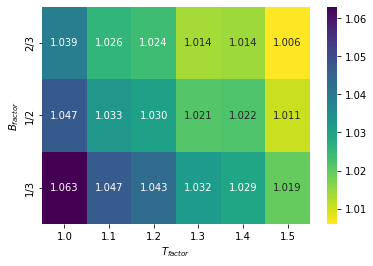

In [10]:
# Visualization

viridis = mpl.colormaps['viridis']
ratio_df = pd.DataFrame(data = real_ratio, index = budget_factor, columns = t_max_factor)
ratio_df.index = ['2/3', '1/2', '1/3']

s1 = sns.heatmap(ratio_df, cmap = viridis.reversed(), 
                annot=True, fmt=".3f"
                )
s1.set(xlabel = '$T_{factor}$', ylabel = '$B_{factor}$')
fig1 = s1.get_figure()
fig1.savefig('real_H1_heuristic.png', dpi = 300, facecolor = 'white')

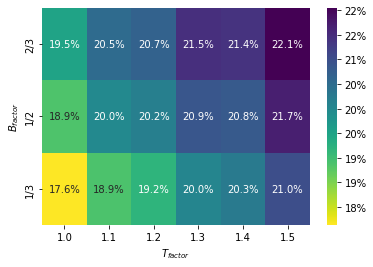

In [11]:

ratio_decrease_df = pd.DataFrame(data = real_ratio_decrease, index = budget_factor, columns = t_max_factor)
ratio_decrease_df.index = ['2/3', '1/2', '1/3']


s2 = sns.heatmap(ratio_decrease_df, cmap = viridis.reversed(), 
                annot=True, fmt = ".1%", 
                cbar_kws = {"format": mtick.PercentFormatter(xmax = 1, decimals = 0)})
s2.set(xlabel = '$T_{factor}$', ylabel = '$B_{factor}$')
fig2 = s2.get_figure()
fig2.savefig('real_H2_heuristic.png', dpi = 300, facecolor = 'white')

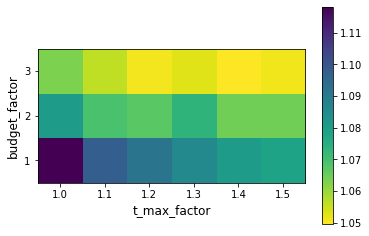

In [52]:
#* Create the heatmap by matplotlib

# fig, ax = plt.subplots()
# im = ax.imshow(ratio_df, cmap = viridis.reversed())

# ax.set_xticks(np.arange(len(t_max_factor)), labels=t_max_factor)
# ax.set_yticks(np.arange(len(budget_factor)), labels=budget_factor)
# plt.xlabel('t_max_factor', fontsize = 12)
# plt.ylabel('budget_factor', fontsize = 12)

# # Plot the color bar
# cbar = ax.figure.colorbar(im, ax=ax)
# cbar.ax.set_ylabel("", rotation=-90, va="bottom")

# plt.savefig('heatmap.png', dpi = 300, facecolor = 'white')

In [8]:
ratio_df

,1.0,1.1,1.2,1.3,1.4,1.5
3,1.100397,1.067724,1.062885,1.061746,1.057784,1.055760
2,1.115070,1.084719,1.086443,1.078418,1.077455,1.071918
1,1.145490,1.121540,1.110766,1.104183,1.102148,1.096335
